In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Diabetesdataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [19]:
X = df.drop('Outcome', axis = 1).values

In [20]:
Y = df['Outcome'].values

In [12]:
import torch

In [13]:
import torch.nn as nn

In [14]:
import torch.nn.functional as F

In [15]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [23]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)

In [24]:
class Model(nn.Module):
    def __init__(self,in_features = 8, H1 = 20, H2 = 20, Out_features = 2):
        super().__init__()
        self.FC1 = nn.Linear(in_features,H1)
        self.FC2 = nn.Linear(H1,H2)
        self.out = nn.Linear(H2,Out_features)
        
    def forward(self,x):
        x = F.relu(self.FC1(x))
        x = F.relu(self.FC2(x))
        x = self.out(x)
        return x

In [25]:
torch.manual_seed(20)
model = Model()

In [27]:
model.parameters

<bound method Module.parameters of Model(
  (FC1): Linear(in_features=8, out_features=20, bias=True)
  (FC2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [28]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [29]:
losses = []
epochs = 500

for i in range(epochs):
    i+=1
    Y_pred = model.forward(X_train)
    loss = criterion(Y_pred,Y_train)
    losses.append(loss)
    
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 3.457212209701538
Epoch number: 11 and the loss : 0.8019440770149231
Epoch number: 21 and the loss : 0.6088424324989319
Epoch number: 31 and the loss : 0.5913469195365906
Epoch number: 41 and the loss : 0.5686198472976685
Epoch number: 51 and the loss : 0.5580593347549438
Epoch number: 61 and the loss : 0.5439403057098389
Epoch number: 71 and the loss : 0.5332612991333008
Epoch number: 81 and the loss : 0.5244495272636414
Epoch number: 91 and the loss : 0.5135409832000732
Epoch number: 101 and the loss : 0.5031548738479614
Epoch number: 111 and the loss : 0.4971022307872772
Epoch number: 121 and the loss : 0.4912615716457367
Epoch number: 131 and the loss : 0.48346713185310364
Epoch number: 141 and the loss : 0.4807611107826233
Epoch number: 151 and the loss : 0.47559434175491333
Epoch number: 161 and the loss : 0.4667322635650635
Epoch number: 171 and the loss : 0.4618053734302521
Epoch number: 181 and the loss : 0.4674965441226959
Epoch number: 191 and 

Text(0, 0.5, 'loss')

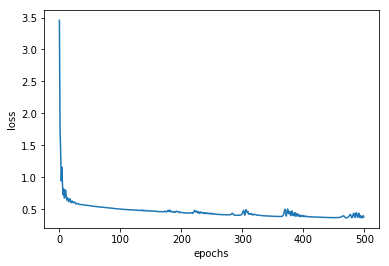

In [30]:
plt.plot(range(epochs),losses)
plt.xlabel('epochs')
plt.ylabel('loss')

In [31]:
with torch.no_grad():
    Y_val = model.forward(X_test)
    loss = criterion(Y_val, Y_test)
print(loss)    

tensor(0.5210)


In [32]:
predictions = []
with torch.no_grad():
    for i,data in enumerate(X_test):
        Y_val = model.forward(data)
        predictions.append(Y_val.argmax().item())
        print(Y_val.argmax().item())

1
0
0
1
0
0
1
1
1
0
1
1
0
1
0
0
1
0
0
0
1
0
0
0
0
1
0
1
0
0
1
0
0
1
0
1
1
0
1
1
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
1
0
1
0
1
1
0
0
1
0
1
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
1
0
1
0
0
1
0
0
1
0
0
0
0
0
1
0
1
0
0
0
0


In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [34]:
print(confusion_matrix(predictions,Y_test))

[[89 17]
 [18 30]]


In [35]:
print(accuracy_score(predictions,Y_test))

0.7727272727272727


In [37]:
#### Save the model
torch.save(model,'diabetes.pt')

In [38]:
#### Save And Load the model
model=torch.load('diabetes.pt')

In [39]:

model.eval()

Model(
  (FC1): Linear(in_features=8, out_features=20, bias=True)
  (FC2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [40]:

### Predcition of new data point
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [41]:
#### New Data
lst1=[6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [42]:
new_data=torch.tensor(lst1)

In [43]:
#### Predict new data using Pytorch
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([1.2184, 1.8694])
1
